# Algoritmo de Dijkstra

In [2]:
using Plots; gr()
using LightGraphs, GraphPlot
using DataStructures, SparseArrays

Creación de la malla M con una dimensión nxn

In [3]:

function genera_malla(M)
    rows, cols = size(M)

    grafo = SimpleGraph(rows * cols)
    pesos = spzeros(rows*cols, rows*cols)

    for i = 2:rows*cols
        if M[i] == 0
            continue
        end
        
        
        # verticales
        if i > 1 && i%rows != 1 && M[i-1] == 1
            add_edge!(grafo, i, i-1)
            pesos[i, i-1] = 1
            pesos[i-1, i] = 1
        end
        
        # horizontales
        if i > rows && M[i-cols] == 1
            add_edge!(grafo, i, i-cols)
            pesos[i, i-cols] = 1
            pesos[i-cols, i] = 1

        end
        

        # diagonal izquierda
        diz = i-cols-1
        if i > cols + 1 && i%cols != 1 && M[diz] == 1
            add_edge!(grafo, i, diz)
            pesos[i, diz] = sqrt(2)
            pesos[diz, i] = sqrt(2)
        end
        
        # diagonal derecha
        did = i+cols-1
        if i%cols != 1 && 1 <= did <=rows*cols && M[did] == 1
            add_edge!(grafo, i, did)
            pesos[i, did] = sqrt(2)
            pesos[did, i] = sqrt(2)
        end
        
    end

    return grafo, pesos, M
end



genera_malla (generic function with 1 method)

 # Pseudocódigo 
 ```
1  function Dijkstra(Graph, source):
2      dist[source] ← 0                           // Initialization
3
4      create vertex priority queue Q
5
6      for each vertex v in Graph:          
7          if v ≠ source
8              dist[v] ← INFINITY                 // Unknown distance from source to v
9              prev[v] ← UNDEFINED                // Predecessor of v
10
11         Q.add_with_priority(v, dist[v])
12
13
14     while Q is not empty:                      // The main loop
15         u ← Q.extract_min()                    // Remove and return best vertex
16         for each neighbor v of u:              // only v that are still in Q
17             alt ← dist[u] + length(u, v)
18             if alt < dist[v]
19                 dist[v] ← alt
20                 prev[v] ← u
21                 Q.decrease_priority(v, alt)
22
23     return dist, prev
```

In [4]:
#Algoritmo de Dikjkstra

function dijkstra(grafo, pesos, inicio)
    
    @assert size(grafo, 1) == size(grafo, 2)
    
    n = nv(grafo) # cantidad de vertices

    # cola de prioridad
    Q = PriorityQueue{Int, Real}()
    
    # Distancia desde el inicio hasta v
    distancia = [Inf for i in 1:n]
    
    # Vértice antecesor desde el inicio
    prev = [ Int[] for i in 1:n]
    distancia[inicio] = 0
    
    for v in 1:n
        enqueue!(Q, v, distancia[v])
    end

    while !isempty(Q)
        u = dequeue!(Q)
        for v in outneighbors(grafo, u)
            alt = distancia[u] + pesos[u, v]

            if alt < distancia[v]
                distancia[v] = alt
                push!(prev[v], u)
                Q[v] = alt
            end
        end
    end

    return distancia, prev
end



dijkstra (generic function with 1 method)

```
1  S ← empty sequence
2  u ← target
3  if prev[u] is defined or u = source:          // Do something only if the vertex is reachable
4      while u is defined:                       // Construct the shortest path with a stack S
5          insert u at the beginning of S        // Push the vertex onto the stack
6          u ← prev[u]                           // Traverse from target to source
```

In [5]:
function ruta_más_corta(grafo, pesos, inicio, final)
    distancia, prev = dijkstra(grafo, pesos, inicio)
    #ds = dijkstra_shortest_paths(grafo, inicio, pesos, allpaths=true)
    #prev= ds.predecessors
    #distancia = ds.dists
    
    s = []
    u = final
    if !isempty(prev[u]) || u == inicio
        while !isempty(prev[u])
            # inserta al inicio
            insert!(s, 1, u)
            u = prev[u][1]
        end
    end
    
    # inserta al inicio
    insert!(s, 1, inicio)
    s, distancia[final]
end

ruta_más_corta (generic function with 1 method)

Any[1, 6, 3, 10, 7, 5]
costo1 = 10.0


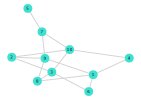

In [13]:
# ejercicio 1

n_nodos = 10
n_aristas = 20
grafo_simple = SimpleGraph(n_nodos)
pesos_simple = spzeros(n_nodos, n_nodos)

for i = 1:n_aristas
    u = rand(1:n_nodos)
    v = rand(1:n_nodos)
    
    # para que no apunto a sí mismo (u -> u)
    while v == u
        v = rand(1:n_nodos)
    end
    add_edge!(grafo_simple, u, v)
    pesos_simple[u, v] = rand(1:5)
    pesos_simple[v, u] = pesos_simple[u, v]
end

inicio = 1
final = 5
ruta, costo1 = ruta_más_corta(grafo_simple, pesos_simple, inicio, final)
println(ruta)
@show costo1
gplot(grafo_simple, nodelabel=1:nv(grafo_simple))

In [7]:
pesos_simple

10×10 SparseMatrixCSC{Float64,Int64} with 34 stored entries:
  [2 ,  1]  =  5.0
  [6 ,  1]  =  1.0
  [1 ,  2]  =  5.0
  [3 ,  2]  =  1.0
  [9 ,  2]  =  4.0
  [2 ,  3]  =  1.0
  [5 ,  3]  =  4.0
  [6 ,  4]  =  3.0
  [9 ,  4]  =  2.0
  [10,  4]  =  2.0
  [3 ,  5]  =  4.0
  [6 ,  5]  =  5.0
  ⋮
  [8 ,  7]  =  5.0
  [9 ,  7]  =  5.0
  [10,  7]  =  3.0
  [5 ,  8]  =  1.0
  [6 ,  8]  =  2.0
  [7 ,  8]  =  5.0
  [2 ,  9]  =  4.0
  [4 ,  9]  =  2.0
  [5 ,  9]  =  4.0
  [7 ,  9]  =  5.0
  [4 , 10]  =  2.0
  [5 , 10]  =  2.0
  [7 , 10]  =  3.0

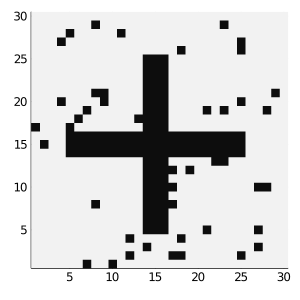

In [8]:
# ejercicio 2
grafo_matriz = [
    0 1 0 0 0 0;
    1 0 1 1 1 0;
    0 1 0 0 0 1;
    0 0 0 0 1 0;
    0 1 0 1 0 0;
    0 0 1 0 0 0
]

tamaño_malla = 30

grafo_matriz = ones(tamaño_malla, tamaño_malla)

# especifico
grafo_matriz[5:25, 14:16] .= 0
grafo_matriz[14:16, 5:25] .= 0

# random
grafo_matriz[rand(1:prod(size(grafo_matriz)), 50)] .= 0

grafo, pesos, M = genera_malla(grafo_matriz)
heatmap(grafo_matriz, fill=:grays, legend=false, size=(300,300))

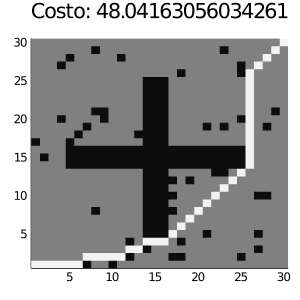

In [9]:
r, costo = ruta_más_corta(grafo, pesos, 1, tamaño_malla^2)

grafo_matriz_con_ruta = copy(grafo_matriz)
grafo_matriz_con_ruta[r] .= 2
heatmap(grafo_matriz_con_ruta, title="Costo: $costo", fill=:grays, legend=false, size=(300,300))

In [10]:
println(r)

Any[1, 31, 61, 91, 121, 151, 182, 212, 242, 272, 302, 333, 363, 394, 424, 454, 485, 516, 547, 578, 609, 640, 671, 702, 733, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 807, 838, 869, 900]
